<a href="https://colab.research.google.com/github/kimhwijin/HandsOnMachineLearing/blob/main/Clustering_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import numpy as np
import matplotlib.pyplot as plt


In [63]:

#dataset
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

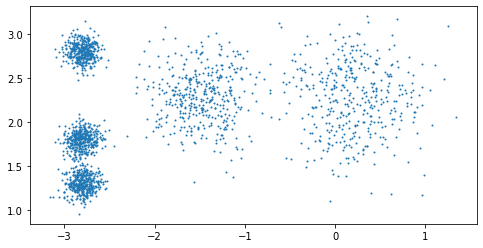

In [64]:
#dataset plot
plt.figure(figsize=(8, 4))
plt.scatter(X[:,0], X[:,1], s=1)
plt.show()

In [65]:
#k-mean
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)
print(y_pred, y_pred.shape)
print(kmeans.labels_, y_pred is kmeans.labels_)
print(kmeans.cluster_centers_, kmeans.cluster_centers_.shape)

[4 2 3 ... 0 3 2] (2000,)
[4 2 3 ... 0 3 2] True
[[-2.79290307  2.79641063]
 [-1.46679593  2.28585348]
 [-2.80389616  1.80117999]
 [ 0.20876306  2.25551336]
 [-2.80037642  1.30082566]] (5, 2)


In [66]:
#new datat predict
X_new = np.array([[0,2], [3,2], [-3,3], [-3,2.5]])
print(kmeans.predict(X_new))

[3 3 0 0]


(1000, 1000)


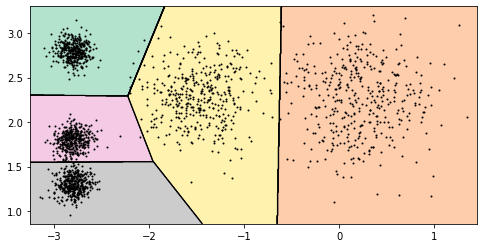

[[2.9042344  0.32995317 2.81093633 1.49439034 2.88633901]
 [5.84739223 2.80290755 5.80730058 4.4759332  5.84236351]
 [0.29040966 3.29399768 1.21475352 1.69136631 1.71086031]
 [0.36159148 3.21806371 0.72581411 1.54808703 1.21567622]]


In [61]:
#결정 경계
def plot_cluster(cluster):
    plt.figure(figsize=(8, 4))
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], num=1000), np.linspace(mins[1], maxs[1], num=1000))

    Z = cluster.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #1000x1000 개의 픽셀지점에 cluster을 지정함
    print(Z.shape)
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    plot_data(X)
    plt.show()

plot_cluster(kmeans)

print(kmeans.transform(X_new))

(1000, 1000)


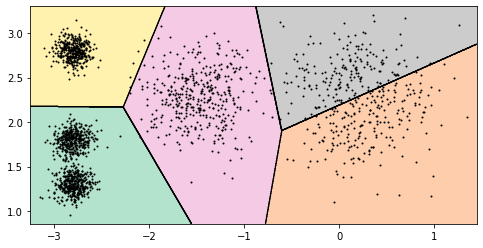

In [69]:
#random cluster
kmeans_random = KMeans(n_clusters=k, init='random', n_init=1)
kmeans_random.fit(X)

plot_cluster(kmeans_random)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=5
  after removing the cwd from sys.path.


(1000, 1000)


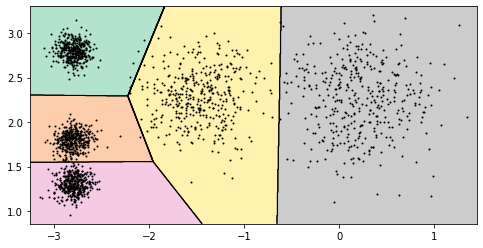

In [74]:
#초기화
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0,2]])
kmeans_init = KMeans(n_clusters=k, init=good_init, n_init=5)
kmeans_init.fit(X)

plot_cluster(kmeans_init)

In [75]:
#이니셔 값
print(kmeans.inertia_, kmeans_random.inertia_, kmeans_init.inertia_)

211.5985372581684 219.45386798941513 211.5985372581684


In [77]:
from sklearn.cluster import MiniBatchKMeans

mini_batch_kmeans = MiniBatchKMeans(n_clusters=k)
mini_batch_kmeans.fit(X)


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)